In [2]:
# To manage the .png size

from PIL import Image
from IPython.display import display
def red_png(path, factor=0.3, yes=0):
    '''This function to display a reduce image.png
    Args:
        path : directory/image.png
        factor : the reduction factor
        yes : set to 0 by default, if put to 1 it means that the size before and after will be displayed
    '''
    img = Image.open(path)
    if yes:
        print("Taille d'origine :", img.size)

    # Redimensionner l'image à 50% de sa taille d'origine
    new_size = (int(img.width * factor), int(img.height * factor))
    img_resized = img.resize(new_size)

    # Afficher la nouvelle taille de l'image
    if yes:
        print("Nouvelle taille :", img_resized.size)

    # Afficher l'image redimensionnée dans le notebook
    display(img_resized)
    print("Source: Internet")

# The logistic regression

## Introduction

The logistic regression is a linear model where we try to estimate a probability instead of a specific value like in simple linear regression.


$Y_i$ ~ $B(p_i)$

Les $Y_i$ suivent une loi de Bernoulli de paramètre $p_i$:  

It means that:

$P(Y_i=1) = p_i$, $P(Y_i = 0) = 1 - p_i$

Which is equivalent to:  

$P(Y_i = k) = {p_i}^k(1 - p_i)^{1-k}$ pour $k \in \{0, 1\}$

# Le modèle linéaire LOGIT

## $logit(\beta) \sim \beta X$

In the logistic regression, we estimate a probability to be classified positive (1).

$p = \frac{1}{1 + \exp(-\beta X)} $

where $ \scriptstyle \beta = (\beta_0,\beta_1, \ldots, \beta_k)$

Que l'on nomme **sigmoïd** et que l'on notera: $h_\beta (X) = \frac{1}{1 + \exp(-\beta X)} $

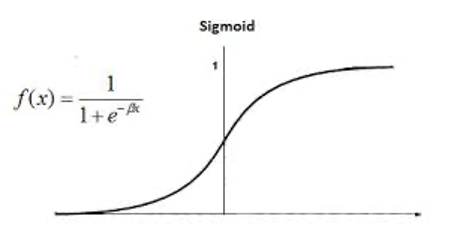

Source: Internet


In [6]:
red_png(r'./sigmoid0.png', factor=1.5)

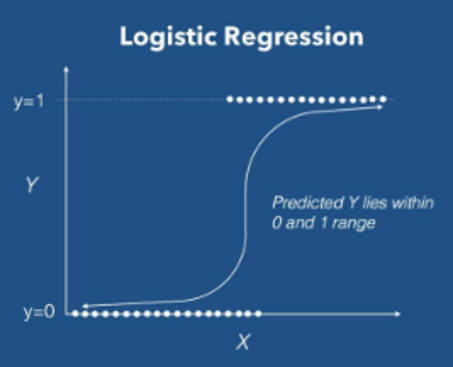

Source: Internet


In [8]:
red_png(r'./sigmoid1.png', factor=1.7)


La fonction logit est utilisée pour transformer une probabilité comprise entre 0 et 1 en une valeur réelle:

$ logit(p) = \log(\frac{p}{1 - p}) = \beta.X$

En effet: 

$p(x) = \frac{1}{1 + \exp(-\beta x)} $  

$\underset{inverse}   \iff \frac{1}{p} = 1 + \exp(-\beta x) $  

$\iff \frac{1}{p} - 1 = \exp(-\beta x) $  

$\iff \frac{1}{p} - \frac{p}{p} = \exp(-\beta x) $  

$\iff \frac{1-p}{p} = \exp(-\beta x) $  

$\iff \log(\frac{1-p}{p}) = -\beta x $  

$\iff \log(\frac{p}{1-p}) = \beta x$

To simplify the writing we have put $ p $ au lieu de $ p(x)$

# The cost function to minimize

La fonction de coût de la régression logistique, également appelée fonction de perte logistique ou **log loss**, est une mesure de l'erreur de prédiction d'un modèle de régression logistique.  
Elle permet d'évaluer la qualité de l'ajustement du modèle aux données d'entraînement et est utilisée pour optimiser les paramètres du modèle pendant l'apprentissage.

La fonction de coût de la régression logistique est définie comme suit :

$J(θ) = -1/n * \sum(Cost(h_\theta(x_i), y_i)$

$J(θ) = -1/n * \sum(y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)))$

où :

- $n$ est le nombre d'exemples dans l'ensemble d'entraînement;  
- $y_i$ est la valeur réelle de la variable dépendante (0 ou 1) pour l'exemple $i$;  
- $h_\theta(x_i)$ est la prédiction du modèle de régression logistique pour l'exemple $i$, en fonction des paramètres $\theta$ et des variables explicatives $x_i$;  

$log$ désigne le logarithme naturel.  

## Convexité


La convexité est une propriété importante en optimisation, car elle garantit qu'un minimum local est également un minimum global. Cela signifie qu'il est plus facile de trouver la solution optimale lors de l'utilisation de méthodes d'optimisation telles que la descente de gradient.

Dans le cas de la fonction Log Loss, sa convexité provient de la forme logarithmique de la fonction, qui est toujours convexe pour des valeurs positives.

La convexité est une propriété importante en optimisation, car elle garantit qu'un minimum local est également un minimum global. Cela signifie qu'il est plus facile de trouver la solution optimale lors de l'utilisation de méthodes d'optimisation telles que la descente de gradient.

Dans le cas de la fonction Log Loss, sa convexité provient de la forme logarithmique de la fonction, qui est toujours convexe pour des valeurs positives.

La convexité d'une fonction garantit qu'un point stationnaire (c'est-à-dire un point où la dérivée est nulle) est un minimum global, mais elle ne garantit pas à elle seule l'existence d'un tel point.

Pour prouver l'existence d'un extremum, il faut également montrer que la fonction est bornée inférieurement et qu'elle atteint cette borne inférieure. En d'autres termes, il faut montrer qu'il existe une valeur minimale que la fonction peut atteindre et qu'il existe au moins un point où la fonction prend cette valeur.

Dans le cas de la fonction Log Loss, on peut montrer qu'elle est bornée inférieurement par zéro (puisque le logarithme d'un nombre positif est toujours positif) et qu'elle atteint cette borne inférieure lorsque les prédictions sont parfaitement correctes (c'est-à-dire lorsque la probabilité prédite pour la classe correcte est égale à 1).

En combinant la convexité de la fonction Log Loss avec le fait qu'elle est bornée inférieurement et qu'elle atteint sa borne inférieure, on peut conclure que la fonction atteint un minimum global lorsque les prédictions sont parfaitement correctes.

## How the Log-Loss was determined ?

The log-loss pénalise les erreurs de prédiction en fonction de la probabilité estimée par le modèle.  
La fonction de coût attribue une pénalité plus élevée aux exemples pour lesquels la prédiction est loin de la valeur réelle, c'est-à-dire lorsque la probabilité estimée est proche de 0 ou de 1 alors que la valeur réelle est respectivement 1 ou 0.

- Si la valeur réelle $y_i$ est égale à 1 (c'est-à-dire que l'exemple appartient à la classe positive), la pénalité est égale à $-log(h_\theta(x_i))$, où $h_\theta(x_i)$ est la probabilité estimée par le modèle que l'exemple appartienne à la classe positive. Plus la probabilité estimée $(h_\theta(x_i))$ est proche de 0 (et donc s'éloigne de l'observation'), plus la pénalité est élevée ($-\log(0^+) \approx +\infty$).  
 
- Si la valeur réelle $y_i$ est égale à 0 (c'est-à-dire que l'exemple appartient à la classe négative), la pénalité est égale à $-log(1 - h_\theta(x_i))$, où $h_\theta(x_i)$ est la probabilité estimée par le modèle que l'exemple appartienne à la classe positive. Plus la probabilité estimée est proche de 1, plus la pénalité est élevée ($-\log(1 - 1^-) \approx +\infty$).  

On résume les deux conditions "si" précédentes en une seule formule : $y_i * log(h_\theta(x_i)) + (1 - y_i) * log(1 - h_\theta(x_i))$ pour l'observation $i$.


**L'objectif de l'apprentissage d'un modèle de régression logistique est de minimiser la fonction de coût en ajustant les paramètres $\theta$.**

Pour ce faire, on utilisera une méthode d'optimisation itérative, **la descente de gradient**, pour trouver les valeurs de $\theta$ qui minimisent la fonction de coût sur l'ensemble d'entraînement.

La fonction de coût de la régression logistique est alors définie comme la moyenne des pénalités sur tous les exemples de l'ensemble d'entraînement.

En minimisant la fonction de coût, on cherche à trouver les paramètres $\theta$ qui permettent de minimiser la somme des pénalités $\underset{\theta} min(J(\theta))$  sur tous les exemples, c'est-à-dire de maximiser la probabilité d'observer les données d'entraînement en fonction des paramètres du modèle.

## Computation of the gradient of the cost function

The gradient of $J(\theta) = \frac{\partial}{\partial \theta}J(\theta)$

We start by transforming the expression of  $J(\theta) = -\frac{1}{n} \sum(y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)))$

$ \log(h_\theta(x_i)) = \log(\frac{1}{1 + \exp(-\theta^Tx_i)}) = -\log(1 + \exp(-\theta^Tx_i))$  

and 

$ \log(1 - h_\theta(x_i)) = \log(1 - \frac{1}{1 + \exp(-\theta^Tx_i)}) = \log(\frac{1 + \exp(-\theta^Tx_i) - 1}{1 + \exp(-\theta^Tx_i)}) = \log(\frac{\exp(-\theta^Tx_i)}{1 + \exp(-\theta^Tx_i)}) = \log(\exp(-\theta^Tx_i)) - \log({1 + \exp(-\theta^Tx_i)}) = -\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)})$

$ \Rightarrow J(\theta) = -\frac{1}{n} \sum[y_i (-\log(1 + \exp(-\theta^Tx_i))) + (1 - y_i) (-\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}))]$

$ \iff J(\theta) = -\frac{1}{n} \sum[y_i (-\log(1 + \exp(-\theta^Tx_i))) + (1 - y_i) (-\theta^Tx_i - \log(1 + exp(-\theta^Tx_i)))]$

$ \iff J(\theta) = -\frac{1}{n} \sum[y_i (-\log(1 + \exp(-\theta^Tx_i))) -\theta^Tx_i - \log(1 + \exp(-\theta^Tx_i)) + y_i \theta^Tx_i  + y_i \log(1 + \exp(-\theta^Tx_i))]$

$ \iff J(\theta) = -\frac{1}{n} \sum[- y_i \log(1 + \exp(-\theta^Tx_i)) -\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) + y_i \theta^Tx_i  + y_i \log(1 + \exp(-\theta^Tx_i))]$

$ \iff J(\theta) = -\frac{1}{n} \sum[\cancel{- y_i \log(1 + \exp(-\theta^Tx_i))} -\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) + y_i \theta^Tx_i  + \cancel{y_i \log(1 + \exp(-\theta^Tx_i))}]$

$ \iff J(\theta) = -\frac{1}{n} \sum[-\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) + y_i \theta^Tx_i  ]$

$ \iff J(\theta) = -\frac{1}{n} \sum[y_i \theta^Tx_i  -\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) ]$


with:

$   -\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) = - \log(\exp(\theta^T x_i)) - \log(1 + \exp(-\theta^Tx_i)) = -(\log(\exp(\theta^T x_i)) + \log(1 + \exp(-\theta^Tx_i))) $  

$= -\log[\exp(\theta^T x_i)(1 + \exp(-\theta^Tx_i))] = -\log(\exp(\theta^T x_i + 1)) $

$ \Rightarrow J(\theta) = -\frac{1}{n} \sum[y_i \theta^Tx_i  -\log(\exp(\theta^T x_i + 1)) ]$

$ \Rightarrow J(\theta) = -\frac{1}{n} \sum[y_i \theta^Tx_i  -\log(1 + \exp(\theta^T x_i)) ]$

$ \Rightarrow  \frac{\partial}{\partial \theta_j}J(\theta) = -\frac{1}{n} \sum[y_i \frac{\partial}{\partial \theta_j} (\theta^Tx_i)  - \frac{\partial}{\partial \theta_j}\log(1 + \exp(\theta^T x_i)) ]$

Knowing that: $\theta^Tx_i = \theta_1 {x_i}^{(1)} + \theta_2 {x_i}^{(2)} + \ldots + \theta_k {x_i}^{(k)}$

$ \Rightarrow   \frac{\partial}{\partial \theta_j} (\theta^Tx_i) = x_i^{(j)} $

And:  

$ \frac{\partial}{\partial \theta_j}\log(1 + \exp(\theta^T x_i)) \underset{\log(u)^{'} = \frac{u^{'}}{u}} = \frac{\frac{\partial}{\partial \theta_j}(1 + \exp(\theta^T x_i))} {1 + \exp(\theta x_i)} = \frac{\frac{\partial}{\partial \theta_j}(\exp(\theta^T x_i))} {1 + \exp(\theta x_i)} \underset{\exp(u)^{'} = u^{'}\exp(u)} =  \frac{\frac{\partial}{\partial \theta_j}(\theta^T x_i) * (\exp(\theta^T x_i))} {1 + \exp(\theta x_i)} $  

$=  \frac{x_i^{(j)} * (\exp(\theta^T x_i))} {1 + \exp(\theta x_i)} = x_i^{(j)} h_\theta(x_i) $

$ \Rightarrow  \frac{\partial}{\partial \theta_j}J(\theta) = -\frac{1}{n} \sum[y_i x_i^{(j)}  - x_i^{(j)} h_\theta(x_i) ] = -\frac{1}{n} \sum[y_i - h_\theta(x_i) ] x_i^{(j)}$

$ \iff  \frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{n} \sum[h_\theta(x_i) - y_i ] x_i^{(j)}$

Sachant que l'expression de la descente de Gradient pour mettre à jour les pondérations est pour le poids $\theta_j$ :

$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$

où $\alpha$ est le learning rate, on obtient:

$\theta_j = \theta_j - \frac{\alpha}{n} \sum[h_\theta(x_i) - y_i ] x_i^{(j)}$

# The Algorithm steps


Note: $\theta = (w,b)$   

with $h_\theta(x) = \frac{1}{1 + \exp(-w x + b)}$

## Training


- Initialize weights as zero
- Initialize bias as zero

## Given a data point

- Predict result by using $\hat{y} = \frac{1}{1 + \exp(-wx+b)}$
- Calculate the error
- Use Gradient descent to figure out new weights and bias values
- Repeat n times

## Testing

Given a data point:  
- Put the values from the data point into the equation $\hat{y} = \frac{1}{1 + \exp(-w+b)}$
- Choose the label based on the probability

In [ ]:
# Logistic Regression from scratch

The inputs:

$X=
\begin{pmatrix}
   x_{1,1} & \ldots & x_{1,k} \\
   x_{2,1} & \ldots & x_{2,k} \\ 
   \ldots & x_{i,j} & \ldots \\ 
   x_{n,1} & \ldots & x_{n,k} 
\end{pmatrix}
$
,
$
w=
\begin{pmatrix}
   w_1 \\
   w_2 \\ 
   \ldots \\ 
   w_k 
\end{pmatrix}
$
,
$b = constant$

The linear model:

$X.w + b$

$=$
$
\begin{pmatrix}
   x_{1,1} & \ldots & x_{1,k} \\
   x_{2,1} & \ldots & x_{2,k} \\ 
   \ldots & x_{i,j} & \ldots \\ 
   x_{n,1} & \ldots & x_{n,k} 
\end{pmatrix}
$
.
$
\begin{pmatrix}
   w_1 \\
   w_2 \\ 
   \ldots \\ 
   w_k 
\end{pmatrix}
$
+
$b$

$=
\begin{pmatrix}
   x_{1,1}w_1 + & \ldots & + x_{1,k}w_k + b \\
   x_{2,1}w_1 + & \ldots & + x_{2,k}w_k + b \\ 
   \ldots     &   \ldots &   \ldots \\ 
   x_{n,1}w_1 + & \ldots & + x_{n,k}w_k + b 
\end{pmatrix}
$

The model prediction (output) is given by:

$sigmoid(X.w+b) = \frac{1}{1 + \exp(-X.w+b)}= \hat{p} = h_\omega(X)$

The updates of the weights and bias are given by:

$\omega_j = \omega_j - \frac{\alpha}{n} \sum[h_\omega(x_i) - y_i ] x_{i,j}$  

$b = b - \frac{\alpha}{n} \sum[h_\omega(x_i) - y_i ]$

For $\omega$ using linear algebra formula:

$\omega = X^t.(\hat{p} - y)$  

$=$
$
\begin{pmatrix}
   x_{1,1} & \ldots & x_{1,n} \\
   x_{2,1} & \ldots & x_{2,n} \\ 
   \ldots & x_{i,j} & \ldots \\ 
   x_{k,1} & \ldots & x_{k,n} 
\end{pmatrix}
$
.
$
\begin{pmatrix}
   \hat{p_1} - y_1 \\
   \hat{p_2} - y_2 \\ 
   \ldots \\ 
   \hat{p_n} - y_n 
\end{pmatrix}
$

For $b$ using linear algebra formula:

$b = \sum(\hat{p} - y)$  

$= \sum
\begin{pmatrix}
   \hat{p_1} - y_1 \\
   \hat{p_2} - y_2 \\ 
   \ldots \\ 
   \hat{p_n} - y_n 
\end{pmatrix}
$

The weights and bias are given by:

$sigmoid(X.w+b) = \frac{1}{1 + \exp(-X.w+b)}= \hat{p}$

In [4]:
# The Logistic Regression from scratch

In [ ]:
import numpy as np

class LogisticRegression:

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __init__(self, lr=0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # initialize the parameters:
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Loop to update the weights with Gradient descent:
        for _ in range(self.n_iter):
            # compute the linear predictions = wX + b:
            linear_model = np.dot(X, self.weights) + self.bias
            # compute the p_hat = sigmoid(wX + b) = 1 / (1 + exp(-wX +b))
            p_hat = self.sigmoid(linear_model)

            # update the weights:
            # w_j = w_j - (alpha / n) * S(p_hat - y_i)xij
            # b = b - (alpha / n) * S(p_hat - y_i)
            dw = (1 / n_samples) * np.dot(X.T, (p_hat - y))
            db = (1 / n_samples) * np.sum(p_hat - y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_class

    

In [20]:
# Testing the algorithm

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [22]:
df = datasets.load_breast_cancer()
X, y = df.data, df.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
def accuracy(y_true, y_pred):
    accuracy = sum(y_true==y_pred)/len(y_true)
    return accuracy

In [38]:
clf = LogisticRegression(lr=0.0001)
clf.fit(X_train, y_train)

In [39]:
predictions = clf.predict(X_test)

In [40]:
accuracy(y_test, predictions)

0.7972027972027972

# APPENDIX

## The Newton-Raphson algorithm

Another way to compute the coefficients

L'algorithme de la méthode de Newton-Raphson est utilisé pour trouver les coefficients de la régression logistique en maximisant la fonction de vraisemblance.  
La régression logistique est un modèle de régression utilisé pour prédire la probabilité d'un événement binaire en fonction d'une ou plusieurs variables prédictives.  

Dans le cas de la régression logistique, la fonction de vraisemblance est une fonction convexe et peut être maximisée à l'aide de l'algorithme de Newton-Raphson.   
L'algorithme de Newton-Raphson est une méthode itérative pour trouver le maximum d'une fonction en utilisant la dérivée et la dérivée seconde de la fonction.

Dans le cas de la régression logistique, la fonction de vraisemblance est donnée par:

$L(\omega | X, y) = prod(p(yi | xi, beta)^{yi} * (1 - p(yi | xi, beta))^{(1 - yi)})$

où $\omega$ est le vecteur de coefficients de la régression logistique, $X$ est la matrice de variables prédictives, $y$ est le vecteur de variables réponses binaires et $p(yi | xi, \omega)$ est la probabilité prédite de l'événement binaire pour l'observation $i$.

Pour maximiser la fonction de vraisemblance, nous pouvons utiliser l'algorithme de Newton-Raphson. À chaque itération, l'algorithme met à jour le vecteur de coefficients beta en utilisant la formule suivante:


$\omega_{i+1} = \omega_i - H^{-1} * g$  

où  

- $H = \frac{\partial^2L}{\partial \omega \partial\omega'}$ est la matrice hessienne de la fonction de vraisemblance,  

- $g = \frac{\partial L}{\partial \omega }$ est le vecteur gradient de la fonction de vraisemblance et  

- $\omega_i$ est le vecteur de coefficients à l'itération $i$.

La matrice hessienne et le vecteur gradient de la fonction de vraisemblance peuvent être calculés à l'aide des dérivées partielles de la fonction de vraisemblance par rapport aux coefficients beta.

Donc, dans le cas de la régression logistique, l'algorithme de la méthode de Newton-Raphson est utilisé pour trouver les coefficients de la régression logistique en maximisant la fonction de vraisemblance.  

Cela permet d'estimer les probabilités de l'événement binaire en fonction des variables prédictives.  

NB: les itérations sont interrompues lorsque la différence entre deux vecteurs de solution successifs est négligeable.

## Coefficients significativity

The Wald statistic allows to test the coefficients significativity $\hat{w_j}$. Wald statistic is given by::    

$(\frac{\hat{w_j}}{\sigma(\hat{w_j})})^2$  

Under $H_0 : \{\hat{w_j} = 0 \} \Longrightarrow \frac{\hat{w_j}}{\sigma(\hat{w_j})} $ ~ $\mathcal{N}(0, 1)$

The added-value of the variable $X_j$ is only real if the Wald statistic > 4 $(3.84 = 1.96^2)$

$Wald > 4$    

$\iff (\frac{\hat{w_j}}{\sigma(\hat{w_j})})^2 > 4$  

$\iff \frac{\hat{w_j}}{\sigma(\hat{w_j})} > 2$  

$\iff \hat{w_j} > 2\sigma(\hat{w_j}) $  

$\iff \hat{w_j} - 2\sigma(\hat{w_j}) > 0$  

$\iff \hat{w_j}$ se trouve à plus de 2 écarts-type de 0  

$\iff $ l'intervalle de confiance de $\hat{w_j}$ ne contient pas 0 à 95%  

CQFD

## Model quality mesure (Deviance)

Cf. S.Tufféry p.315

$n:$ number of observations  
$k:$ number of features

$L(\omega_k)$ Likelihood of the "modèle ajusté"  

$L(\omega_0)$ Likelihood of the "modèle réduit à la constante"  

$L(\omega_{max})$ Likelihood of the "modèle saturé". The one the model will compare.  


The Deviance formula:  

$D(\omega_k) = -2[log(L(\omega_k)) - log(L(\omega_{max}))]$  $^{(*)}$

As the target is 0 or 1 $\Longrightarrow L(\omega_{max})=1 \Longrightarrow log(L(\omega_{max}))=0$  

$\Longrightarrow D(\omega_k) = -2[log(L(\omega_k))]$

(*) $D(\omega_k) = (\frac{log(L(\omega_k))}{log(L(\omega_{max}))}^2)$ 

The goal of the logistic regression is to maximise the Likelihood which is equivalent to minimize the Deviance.

The Deviance is equivalent to the SCE for the linear regression.

In [ ]:
# Full example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and target (0 = malignant, 1 = benign)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Plot feature importance (coefficients)
plt.figure(figsize=(10, 5))
plt.barh(data.feature_names, model.coef_[0])
plt.xlabel("Coefficient value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.show()

: 